<blockquote>
Built on Numy, this library provides convenient data structures for representing series and 
tables of data and makes it easy to transform, split, merge, and convert data. [Version: 1.2.4]
</blockquote>
<a href="https://pandas.pydata.org/"> Pandas</a> 

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib as mpl
#mpl.style.use('ggplot')

### Series

In [2]:
# One-dimensional ndarray with axis labels
s = pd.Series([1961.63, 1985.05, 1982.3, 1994.65, 2018.05])
s

0    1961.63
1    1985.05
2    1982.30
3    1994.65
4    2018.05
dtype: float64

In [3]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [4]:
s.values  #it's an ndarray!

array([1961.63, 1985.05, 1982.3 , 1994.65, 2018.05])

In [5]:
s.index = ['10/27/2014', '10/28/2014', '10/29/2014', '10/30/2014', '10/31/2014']
s.name = "Close"
s

10/27/2014    1961.63
10/28/2014    1985.05
10/29/2014    1982.30
10/30/2014    1994.65
10/31/2014    2018.05
Name: Close, dtype: float64

In [6]:
s["10/30/2014"]  

1994.65

#### Describe it

In [30]:
s.count()

5

In [31]:
s.mean(),s.median(),s.std()

(1988.336, 1985.05, 20.513592566881073)

In [32]:
s.min(), s.max()

(1961.63, 2018.05)

In [9]:
s.describe()

count       5.000000
mean     1988.336000
std        20.513593
min      1961.630000
25%      1982.300000
50%      1985.050000
75%      1994.650000
max      2018.050000
Name: Close, dtype: float64

#### Time series calculation

In [7]:
s_change = s.pct_change()
s_change

10/27/2014         NaN
10/28/2014    0.011939
10/29/2014   -0.001385
10/30/2014    0.006230
10/31/2014    0.011731
Name: Close, dtype: float64

In [8]:
s_change.dropna()

10/28/2014    0.011939
10/29/2014   -0.001385
10/30/2014    0.006230
10/31/2014    0.011731
Name: Close, dtype: float64

#### Plot it

<AxesSubplot:title={'center':'pie'}, ylabel='Close'>

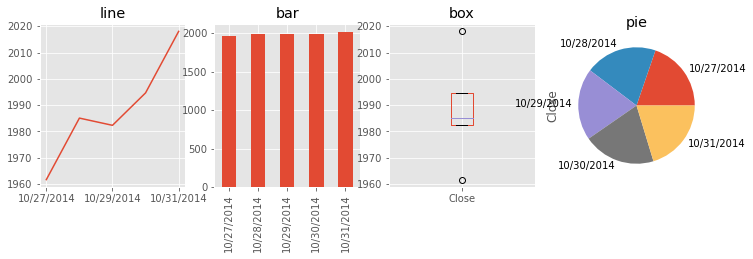

In [37]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
s.plot(ax=axes[0], kind='line', title='line')
s.plot(ax=axes[1], kind='bar', title='bar')
s.plot(ax=axes[2], kind='box', title='box')
s.plot(ax=axes[3], kind='pie', title='pie')

In [10]:
#Convert a Series to a DataFrame
d = s.to_frame()
d

,Close
10/27/2014,1961.63
10/28/2014,1985.05
10/29/2014,1982.30
10/30/2014,1994.65
10/31/2014,2018.05


### DataFrame

In [26]:
df1 = pd.DataFrame([[1961.63, 3538860000],
                    [1985.05, 3653260000],
                    [1982.3, 3740350000],
                    [1994.65, 3586150000],
                    [2018.05,4292290000]])
df1.columns = ["Close", "Volume"]
df1.index = ['10/27/2014', '10/28/2014', '10/29/2014', '10/30/2014', '10/31/2014']
df1

,Close,Volume
10/27/2014,1961.63,3538860000
10/28/2014,1985.05,3653260000
10/29/2014,1982.30,3740350000
10/30/2014,1994.65,3586150000
10/31/2014,2018.05,4292290000


In [25]:
df2 = pd.DataFrame({'Close':[2961.63, 2985.05, 2982.3, 2994.65, 3018.05],
                   'Volume':[3538860000, 3653260000, 3740350000, 3586150000, 4292290000]},
                      index=['10/27/2014', '10/28/2014', '10/29/2014', '10/30/2014', '10/31/2014'])
df2

,Close,Volume
10/27/2014,2961.63,3538860000
10/28/2014,2985.05,3653260000
10/29/2014,2982.30,3740350000
10/30/2014,2994.65,3586150000
10/31/2014,3018.05,4292290000


In [13]:
df2["Close"]

10/27/2014    1961.63
10/28/2014    1985.05
10/29/2014    1982.30
10/30/2014    1994.65
10/31/2014    2018.05
Name: Close, dtype: float64

In [35]:
df2[:2]

,Close,Volume
10/27/2014,2961.63,3538860000
10/28/2014,2985.05,3653260000


#### Selection by label

In [32]:
df2.loc['10/27/2014']

Close     2.961630e+03
Volume    3.538860e+09
Name: 10/27/2014, dtype: float64

In [36]:
df2.loc[["10/27/2014", "10/29/2014"]]

,Close,Volume
10/27/2014,2961.63,3538860000
10/29/2014,2982.30,3740350000


In [37]:
df2.loc[["10/27/2014", "10/29/2014"], "Volume"]

10/27/2014    3538860000
10/29/2014    3740350000
Name: Volume, dtype: int64

#### Selection by position

In [18]:
df2.iloc[:2,0]

10/27/2014    1961.63
10/28/2014    1985.05
Name: Close, dtype: float64

In [38]:
df2.iloc[:2,:]

,Close,Volume
10/27/2014,2961.63,3538860000
10/28/2014,2985.05,3653260000


#### Describe it

In [19]:
df2.describe()

,Close,Volume
count,5.000000,5.000000e+00
mean,1988.336000,3.762182e+09
std,20.513593,3.058656e+08
min,1961.630000,3.538860e+09
25%,1982.300000,3.586150e+09
50%,1985.050000,3.653260e+09
75%,1994.650000,3.740350e+09
max,2018.050000,4.292290e+09


## Mini Case

In [41]:
from datetime import date
required_Cols = ['COB','TRADE_DATE', 'INSTRUMENT_ID', 'MATURITY_DATE', 'ProdType', 'CompoSwap','MARKET_VALUE', 'CPYID']

trade_df1 = pd.read_csv("trades_929.csv",index_col=['COB'],usecols=required_Cols,parse_dates=['TRADE_DATE','MATURITY_DATE'])
trade_df1['MATURITY_DATE'] = trade_df1['MATURITY_DATE'].dt.date

trade_df2 = pd.read_csv("trades_930.csv",index_col=['COB'],usecols=required_Cols,parse_dates=['TRADE_DATE','MATURITY_DATE'])
trade_df2['MATURITY_DATE'] = trade_df2['MATURITY_DATE'].dt.date

In [42]:
trade_df1.head(3)

,TRADE_DATE,INSTRUMENT_ID,MATURITY_DATE,ProdType,CompoSwap,MARKET_VALUE,CPYID
COB,,,,,,,
9/29/2021,2019-02-01,43456,2022-03-02,EQF,NO,100,32
9/29/2021,2019-02-01,43456,2021-09-28,EQF,NO,100,32
9/29/2021,2019-02-01,43456,2022-03-02,EQF,NO,100,32


In [43]:
trade_df1 = trade_df1[trade_df1['MATURITY_DATE'] > date(2021,9,29)]
trade_df1

,TRADE_DATE,INSTRUMENT_ID,MATURITY_DATE,ProdType,CompoSwap,MARKET_VALUE,CPYID
COB,,,,,,,
9/29/2021,2019-02-01,43456,2022-03-02,EQF,NO,100,32
9/29/2021,2019-02-01,43456,2022-03-02,EQF,NO,100,32
9/29/2021,2019-02-03,66778,2022-03-04,Swap,YES,200,55
9/29/2021,2019-02-04,88990,2022-03-05,Swap,NO,200,55


In [44]:
trade_df2.head()

,TRADE_DATE,INSTRUMENT_ID,MATURITY_DATE,ProdType,CompoSwap,MARKET_VALUE,CPYID
COB,,,,,,,
9/30/2021,2019-02-01,33456,2022-03-02,EQF,NO,100,32
9/30/2021,2019-02-01,33456,2022-03-02,EQF,NO,100,32
9/30/2021,2019-02-03,56778,2022-03-04,Swap,YES,300,55
9/30/2021,2019-02-04,78990,2022-03-05,Swap,NO,300,55


In [45]:
trade_df = pd.concat([trade_df1,trade_df2], axis=0)
trade_df

,TRADE_DATE,INSTRUMENT_ID,MATURITY_DATE,ProdType,CompoSwap,MARKET_VALUE,CPYID
COB,,,,,,,
9/29/2021,2019-02-01,43456,2022-03-02,EQF,NO,100,32
9/29/2021,2019-02-01,43456,2022-03-02,EQF,NO,100,32
9/29/2021,2019-02-03,66778,2022-03-04,Swap,YES,200,55
9/29/2021,2019-02-04,88990,2022-03-05,Swap,NO,200,55
9/30/2021,2019-02-01,33456,2022-03-02,EQF,NO,100,32
9/30/2021,2019-02-01,33456,2022-03-02,EQF,NO,100,32
9/30/2021,2019-02-03,56778,2022-03-04,Swap,YES,300,55
9/30/2021,2019-02-04,78990,2022-03-05,Swap,NO,300,55


#### Groupby and Pivot table

<blockquote>
By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria

- Applying a function to each group independently

- Combining the results into a data structure
</blockquote>

In [95]:
type(trade_df.groupby(by = ['COB','CPYID']))

pandas.core.groupby.generic.DataFrameGroupBy

In [96]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
trade_grp = trade_df.groupby(by = ['COB','CPYID']).agg({
    'INSTRUMENT_ID': lambda x:x.nunique(),
    'MARKET_VALUE':['sum']
})
trade_grp

INSTRUMENT_ID MARKET_VALUE
                     <lambda>          sum
COB       CPYID                           
9/29/2021 32                1          200
          55                2          400
9/30/2021 32                1          200
          55                2          600

In [97]:
type(trade_grp)

pandas.core.frame.DataFrame

In [98]:
trade_grp.index

MultiIndex([('9/29/2021', 32),
            ('9/29/2021', 55),
            ('9/30/2021', 32),
            ('9/30/2021', 55)],
           names=['COB', 'CPYID'])

In [99]:
trade_grp.columns

MultiIndex([('INSTRUMENT_ID', '<lambda>'),
            ( 'MARKET_VALUE',      'sum')],
           )

In [65]:
trade_grp = trade_grp.reset_index()
trade_grp

,COB,CPYID,INSTRUMENT_ID,MARKET_VALUE
,,,<lambda>,sum
0,9/29/2021,32,1,200
1,9/29/2021,55,2,400
2,9/30/2021,32,1,200
3,9/30/2021,55,2,600


In [66]:
trade_grp = trade_grp.droplevel(level = 1, axis = 1)
trade_grp

,COB,CPYID,INSTRUMENT_ID,MARKET_VALUE
0,9/29/2021,32,1,200
1,9/29/2021,55,2,400
2,9/30/2021,32,1,200
3,9/30/2021,55,2,600


In [67]:
trade_grp_pvt = trade_grp.pivot(index='COB',columns='CPYID', values = 'MARKET_VALUE')
trade_grp_pvt

CPYID,32,55
COB,,
9/29/2021,200,400
9/30/2021,200,600


In [68]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html
trade_tbl = trade_df.pivot_table(values='MARKET_VALUE', index=['COB'], columns=['CPYID'], aggfunc=np.sum)
trade_tbl

CPYID,32,55
COB,,
9/29/2021,200,400
9/30/2021,200,600


#### Merge/join two tables

In [12]:
merged_df = trade_df1.merge(trade_df2, how='inner', on='CPYID',suffixes=('_left', '_right'))
merged_df

,TRADE_DATE_left,INSTRUMENT_ID_left,MATURITY_DATE_left,ProdType_left,CompoSwap_left,MARKET_VALUE_left,CPYID,TRADE_DATE_right,INSTRUMENT_ID_right,MATURITY_DATE_right,ProdType_right,CompoSwap_right,MARKET_VALUE_right
0,2019-02-01,43456,2022-03-02,EQF,NO,100,32,2019-02-01,33456,2022-03-02,EQF,NO,100
1,2019-02-01,43456,2022-03-02,EQF,NO,100,32,2019-02-01,33456,2022-03-02,EQF,NO,100
2,2019-02-01,43456,2022-03-02,EQF,NO,100,32,2019-02-01,33456,2022-03-02,EQF,NO,100
3,2019-02-01,43456,2022-03-02,EQF,NO,100,32,2019-02-01,33456,2022-03-02,EQF,NO,100
4,2019-02-03,66778,2022-03-04,Swap,YES,200,55,2019-02-03,56778,2022-03-04,Swap,YES,300
5,2019-02-03,66778,2022-03-04,Swap,YES,200,55,2019-02-04,78990,2022-03-05,Swap,NO,300
6,2019-02-04,88990,2022-03-05,Swap,NO,200,55,2019-02-03,56778,2022-03-04,Swap,YES,300
7,2019-02-04,88990,2022-03-05,Swap,NO,200,55,2019-02-04,78990,2022-03-05,Swap,NO,300


#### Add a new column, drop a column

In [69]:
trade_df1

,TRADE_DATE,INSTRUMENT_ID,MATURITY_DATE,ProdType,CompoSwap,MARKET_VALUE,CPYID
COB,,,,,,,
9/29/2021,2019-02-01,43456,2022-03-02,EQF,NO,100,32
9/29/2021,2019-02-01,43456,2022-03-02,EQF,NO,100,32
9/29/2021,2019-02-03,66778,2022-03-04,Swap,YES,200,55
9/29/2021,2019-02-04,88990,2022-03-05,Swap,NO,200,55


In [70]:
trade_df1['FX_RATE'] = [1.0,1.2,1.3,1.4]

In [71]:
trade_df1

,TRADE_DATE,INSTRUMENT_ID,MATURITY_DATE,ProdType,CompoSwap,MARKET_VALUE,CPYID,FX_RATE
COB,,,,,,,,
9/29/2021,2019-02-01,43456,2022-03-02,EQF,NO,100,32,1.0
9/29/2021,2019-02-01,43456,2022-03-02,EQF,NO,100,32,1.2
9/29/2021,2019-02-03,66778,2022-03-04,Swap,YES,200,55,1.3
9/29/2021,2019-02-04,88990,2022-03-05,Swap,NO,200,55,1.4


In [72]:
trade_df1['MARKET_VALUE_USD'] = trade_df1['MARKET_VALUE']*trade_df1['FX_RATE']
trade_df1

,TRADE_DATE,INSTRUMENT_ID,MATURITY_DATE,ProdType,CompoSwap,MARKET_VALUE,CPYID,FX_RATE,MARKET_VALUE_USD
COB,,,,,,,,,
9/29/2021,2019-02-01,43456,2022-03-02,EQF,NO,100,32,1.0,100.0
9/29/2021,2019-02-01,43456,2022-03-02,EQF,NO,100,32,1.2,120.0
9/29/2021,2019-02-03,66778,2022-03-04,Swap,YES,200,55,1.3,260.0
9/29/2021,2019-02-04,88990,2022-03-05,Swap,NO,200,55,1.4,280.0


In [81]:
trade_df1.drop(['FX_RATE'], axis=1, inplace = True)  
trade_df1

,TRADE_DATE,INSTRUMENT_ID,MATURITY_DATE,ProdType,CompoSwap,MARKET_VALUE,CPYID,MARKET_VALUE_USD
COB,,,,,,,,
9/29/2021,2019-02-01,43456,2022-03-02,EQF,NO,100,32,100.0
9/29/2021,2019-02-01,43456,2022-03-02,EQF,NO,100,32,120.0
9/29/2021,2019-02-03,66778,2022-03-04,Swap,YES,200,55,260.0
9/29/2021,2019-02-04,88990,2022-03-05,Swap,NO,200,55,280.0


In [84]:
df2 = pd.DataFrame({"X": ["B", "B", "A", "A"], "Y": [1, 2, 3, 4]})
df2

,X,Y
0,B,1
1,B,2
2,A,3
3,A,4


In [87]:
grp = df2.groupby(["X"])

In [88]:
type(grp)

pandas.core.groupby.generic.DataFrameGroupBy

In [91]:
grp.groups

{'A': [2, 3], 'B': [0, 1]}

In [89]:
type(grp1)

pandas.core.frame.DataFrame